In [37]:
import xymass
import numpy as np
import scipy
import matplotlib.pyplot as plt

In [38]:
#generate samples of stellar positions from various analytic models

#sample 10000 stars from flattened Plummer distribution with Plummer scale radius = 10 (arbitrary units), ellipticity=0.5, position angle = 35 degrees
plum=xymass.sample_r2d(10000,'plum',r_scale=10.,ellipticity=0.5,position_angle=35.)

#sample 10000 stars from flattened exponential distribution
exp=xymass.sample_r2d(10000,'exp',r_scale=7.,ellipticity=0.7,position_angle=-20.)

#sample 10000 stars from flattened '2bg' distribution 
bg=xymass.sample_r2d(10000,'2bg',r_scale=5.,ellipticity=0.3,position_angle=85.,beta=10.,gamma=0.9)

#sample 10000 stars from uniform distribution within circle of radius 15 (arbitrary units)
uni=xymass.sample_r2d(10000,'uni',r_scale=15.)

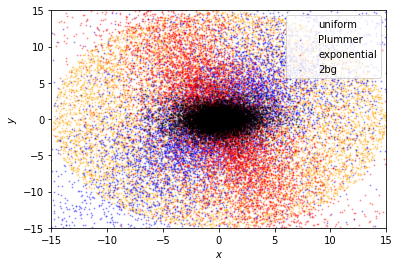

In [39]:
#make scatterplots of 2d stellar positions, in units of the model scale radius

plt.scatter(uni.x,uni.y,s=1,alpha=0.3,color='orange',label='uniform')
plt.scatter(plum.x,plum.y,s=1,alpha=0.3,color='b',label='Plummer')
plt.scatter(exp.x,exp.y,s=1,alpha=0.3,color='r',label='exponential')
plt.scatter(bg.x,bg.y,s=1,alpha=0.3,color='k',label='2bg')
plt.xlim([-15,15])
plt.ylim([-15,15])
plt.xlabel(r'$x$')
plt.ylabel(r'$y$')
plt.legend(loc=1)
plt.show()
plt.close()

In [40]:
#use sampled positions to make histogram, binning by sampled elliptical radius

#plummer model
hist_plum=np.histogram(plum.r_ell/plum.r_scale,bins=50,range=[0,10])
plum_bin_radius=[]
plum_bin_area=[]
for i in range(0,len(hist_plum[0])):
    plum_bin_radius.append(np.mean([hist_plum[1][i],hist_plum[1][i+1]]))
    plum_bin_area.append(np.pi*plum.r_scale**2*(hist_plum[1][i+1]**2-hist_plum[1][i]**2))
plum_bin_radius=np.array(plum_bin_radius)
plum_bin_area=np.array(plum_bin_area)
plum_bin_surface_density=hist_plum[0]/plum_bin_area
plum_bin_surface_density_err=np.sqrt(hist_plum[0])/plum_bin_area

#exponential model
hist_exp=np.histogram(exp.r_ell/exp.r_scale,bins=50,range=[0,10])
exp_bin_radius=[]
exp_bin_area=[]
for i in range(0,len(hist_exp[0])):
    exp_bin_radius.append(np.mean([hist_exp[1][i],hist_exp[1][i+1]]))
    exp_bin_area.append(np.pi*exp.r_scale**2*(hist_exp[1][i+1]**2-hist_exp[1][i]**2))
exp_bin_radius=np.array(exp_bin_radius)
exp_bin_area=np.array(exp_bin_area)
exp_bin_surface_density=hist_exp[0]/exp_bin_area
exp_bin_surface_density_err=np.sqrt(hist_exp[0])/exp_bin_area

#2bg model
hist_bg=np.histogram(bg.r_ell/bg.r_scale,bins=50,range=[0,10])
bg_bin_radius=[]
bg_bin_area=[]
for i in range(0,len(hist_bg[0])):
    bg_bin_radius.append(np.mean([hist_bg[1][i],hist_bg[1][i+1]]))
    bg_bin_area.append(np.pi*bg.r_scale**2*(hist_bg[1][i+1]**2-hist_bg[1][i]**2))
bg_bin_radius=np.array(bg_bin_radius)
bg_bin_area=np.array(bg_bin_area)
bg_bin_surface_density=hist_bg[0]/bg_bin_area
bg_bin_surface_density_err=np.sqrt(hist_bg[0])/bg_bin_area

#uniform model
hist_uni=np.histogram(uni.r_ell/uni.r_scale,bins=50,range=[0,1])
uni_bin_radius=[]
uni_bin_area=[]
for i in range(0,len(hist_uni[0])):
    uni_bin_radius.append(np.mean([hist_uni[1][i],hist_uni[1][i+1]]))
    uni_bin_area.append(np.pi*uni.r_scale**2*(hist_uni[1][i+1]**2-hist_uni[1][i]**2))
uni_bin_radius=np.array(uni_bin_radius)
uni_bin_area=np.array(uni_bin_area)
uni_bin_surface_density=hist_uni[0]/uni_bin_area
uni_bin_surface_density_err=np.sqrt(hist_uni[0])/uni_bin_area

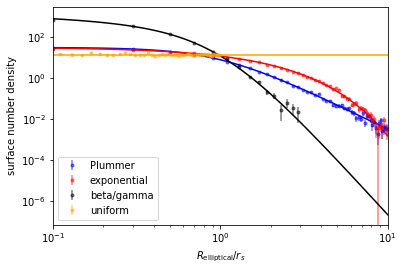

In [41]:
#plot surface number density profiles from samples

#analytic functions to overplot
x=np.logspace(-1.2,1,100)
y_plum=plum.func(x)
y_exp=exp.func(x)
y_bg=bg.func(x)
y_uni=uni.func(x)

#plummer
plt.errorbar(plum_bin_radius,plum_bin_surface_density,yerr=plum_bin_surface_density_err,fmt='.',label='Plummer',color='b',alpha=0.5)                                                                                                                              
plt.plot(x,y_plum,color='b')

#exponential
plt.errorbar(exp_bin_radius,exp_bin_surface_density,yerr=exp_bin_surface_density_err,fmt='.',label='exponential',color='r',alpha=0.5)                                                                                                                              
plt.plot(x,y_exp,color='r')                                                                                                                                     

#2bg
plt.errorbar(bg_bin_radius,bg_bin_surface_density,yerr=bg_bin_surface_density_err,fmt='.',label='beta/gamma',color='k',alpha=0.5)                                                                                                                              
plt.plot(x,y_bg,color='k')                                                                                                                                     

#uniform
plt.errorbar(uni_bin_radius,uni_bin_surface_density,yerr=uni_bin_surface_density_err,fmt='.',label='uniform',color='orange',alpha=0.5)                                                                                                                              
plt.plot(x,y_uni,color='orange')

plt.xscale('log')                                                                                                                                 
plt.yscale('log')   
plt.xlim([0.1,10])
plt.xlabel(r'$R_{\rm elliptical}/r_{s}$')
plt.ylabel('surface number density')
plt.legend(loc=3)
plt.show()
plt.close()